# Submetric: 2025 Monthly Criminal Activity.
### By Neal Gummadi

For my sub-metric, I focused on violent crime as a way of measuring how peaceful a neighborhood is. Safety plays a major role in how residents experience where they live — it affects community life, mobility, trust, and overall quality of life. While we initially considered using total crime incidents, I decided that total crime can be misleading because many non-violent crimes (like minor theft or property damage) do not directly impact a person's physical safety. Therefore, I chose to specifically analyze violent crimes, which more accurately reflect how safe or unsafe a place may feel.

To create my metric, I used the Monthly Criminal Activity Dataset (January 2024 – October 2025) from the Western Pennsylvania Regional Data Center (WPRDC):
https://data.wprdc.org/dataset/monthly-criminal-activity-dashboard

This dataset includes detailed incident-level police reports, including the neighborhood where each crime occurred and the type of offense. From this dataset, I isolated five offense categories recognized as violent under the FBI’s National Incident-Based Reporting System (NIBRS):

Assault Offenses

Robbery

Sex Offenses

Kidnapping/Abduction

Homicide Offenses

These categories were selected because they involve direct harm or threat of harm to individuals.

Metric Calculation

I filtered the dataset to include only those violent offense categories and then counted the total number of violent incidents in each neighborhood during the time period:

Violent Crime Count
=
Number of violent crime incidents per neighborhood
Violent Crime Count=Number of violent crime incidents per neighborhood

Under this metric, neighborhoods with fewer violent incidents are considered more peaceful.

So What's the Most Peaceful Neighborhood?

After ranking the neighborhoods from the lowest to highest number of violent offenses, I found that:

Ridgemont had the fewest violent crime incidents (only 3), making it the Most Peaceful Neighborhood in Pittsburgh under this metric.

Other neighborhoods that ranked highly for peacefulness included Regent Square, Swisshelm Park, and Saint Clair — all of which had fewer than 10 incidents during the time period studied. Meanwhile, neighborhoods such as Downtown and East Liberty showed significantly higher counts, reflecting more active or densely populated areas.

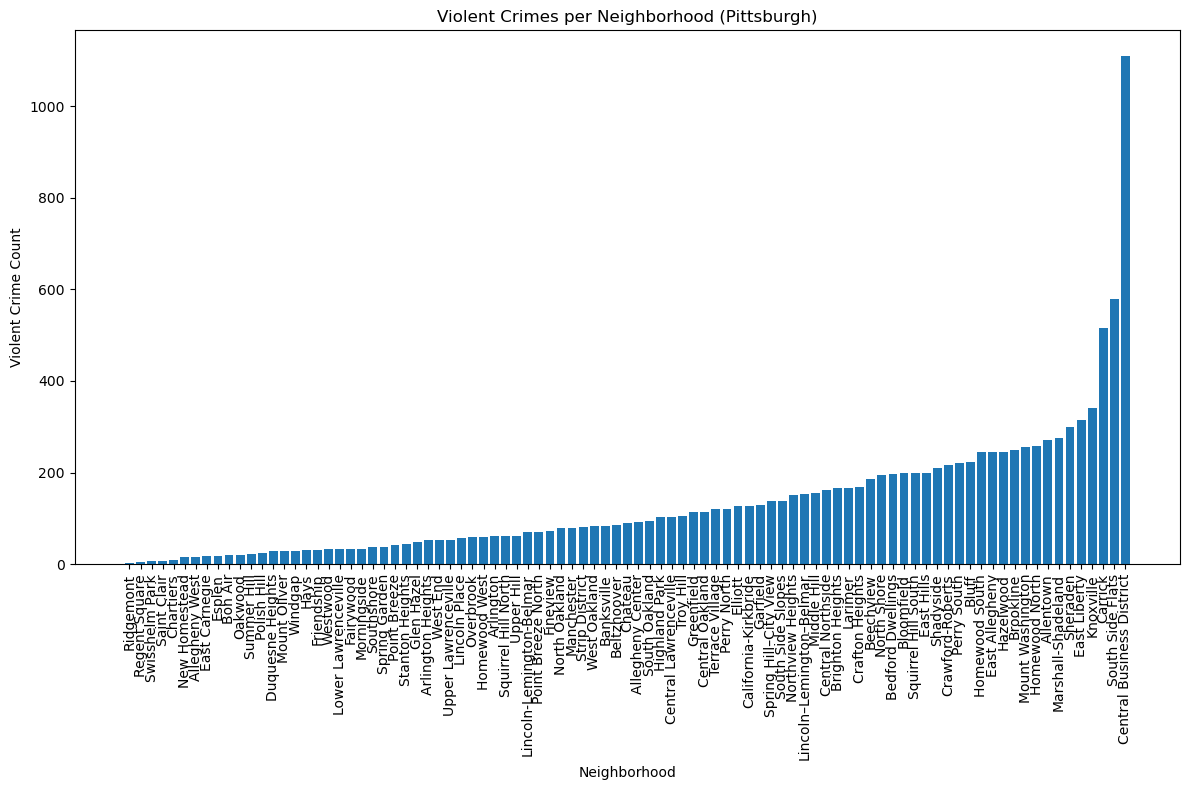

,Neighborhood,Violent_Crime_Count
67,Ridgemont,3
66,Regent Square,5
82,Swisshelm Park,7
68,Saint Clair,7
20,Chartiers,9
55,New Homestead,15
1,Allegheny West,16
26,East Carnegie,17
30,Esplen,17
11,Bon Air,21


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.wprdc.org/datastore/dump/bd41992a-987a-4cca-8798-fbe1cd946b07?format=csv"
df = pd.read_csv(url, low_memory=False)

violent_categories = [
    "Assault Offenses",
    "Robbery",
    "Sex Offenses",
    "Kidnapping/Abduction",
    "Homicide Offenses"
]

violent_crimes = df[df["NIBRS_Offense_Category"].isin(violent_categories)]

peace_score = (
    violent_crimes.groupby("Neighborhood")
    .size()
    .reset_index(name="Violent_Crime_Count")
    .sort_values("Violent_Crime_Count")
)

plt.figure(figsize=(12, 8))
plt.bar(peace_score["Neighborhood"], peace_score["Violent_Crime_Count"])
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Violent Crime Count")
plt.title("Violent Crimes per Neighborhood (Pittsburgh)")
plt.tight_layout()
plt.show()

#peace_score.head(90)
pd.set_option("display.max_rows", None)
peace_score

In [7]:
df["NIBRS_Offense_Category"].value_counts().head(30)


NIBRS_Offense_Category
Larceny/Theft Offenses                      13438
Not NIBRS Reportable                        13113
Assault Offenses                            11768
All other Offenses                          11306
Drug/Narcotic Offenses                       6201
Destruction/Damage/Vandalism of Property     5879
Fraud Offenses                               3927
Motor Vehicle Theft                          2184
Burglary/Breaking & Entering                 1621
Weapon Law Violations                        1444
Robbery                                       835
Sex Offenses                                  535
Arson                                         210
Kidnapping/Abduction                          168
Homicide Offenses                              71
Human Trafficking                               9
Name: count, dtype: int64

# Conclusion

Based on my submetric of violent crime, the most peaceful neighborhood in Pittsburgh is Ridgemont. I defined “peacefulness” as having fewer incidents of violent crime, which I measured using five NIBRS offense categories: Assault Offenses, Robbery, Sex Offenses, Kidnapping/Abduction, and Homicide Offenses. I aggregated all reported offenses in these categories from January 2024 through October 2025 and counted the number of incidents per neighborhood. Ridgemont had only 3 recorded violent offenses in this time period, which is significantly lower than most neighborhoods in the city. Therefore, using the metric of low violent crime as a measure of peace, Ridgemont is the most peaceful neighborhood in Pittsburgh.